IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, classification_report, confusion_matrix


from warnings import filterwarnings
filterwarnings(action='ignore')

LOAD WINE DATASET

In [3]:
wine = pd.read_csv('winequalityN.csv')
wine=wine.drop('type',axis=1)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine.shape

(6497, 12)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6487 non-null   float64
 1   volatile acidity      6489 non-null   float64
 2   citric acid           6494 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6488 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


DESCRIPTION OF DATA

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


FINDING NULL VALUES

In [7]:
wine.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

REMOVING NULL VALUES

In [8]:
wine=wine.dropna()

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  quality               6463 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 656.4 KB


GROUPING BY QUALITY

In [11]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.281308,0.458084,0.272290,4.125234,0.059864,20.745327,103.866822,0.994820,3.231963,0.505841,10.176636
5,7.329699,0.389774,0.307923,5.790602,0.064740,30.223919,120.715695,0.995847,3.212242,0.526184,9.838759
6,7.180035,0.313598,0.323734,5.556454,0.054154,31.147163,115.385106,0.994560,3.217443,0.532365,10.588475
7,7.131425,0.289055,0.334832,4.746182,0.045291,30.409683,108.370577,0.993130,3.227728,0.547058,11.389572
8,6.838542,0.289089,0.331771,5.404688,0.041188,34.562500,117.739583,0.992531,3.222656,0.513125,11.672917
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


DATA ANALYSIS

COUNTPLOT

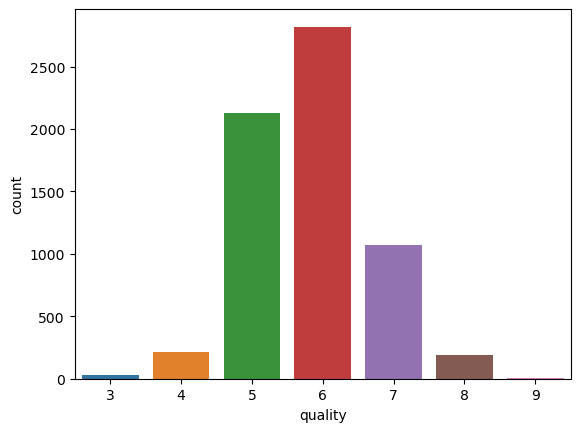

In [12]:
sns.countplot(x=wine['quality'])
plt.show()

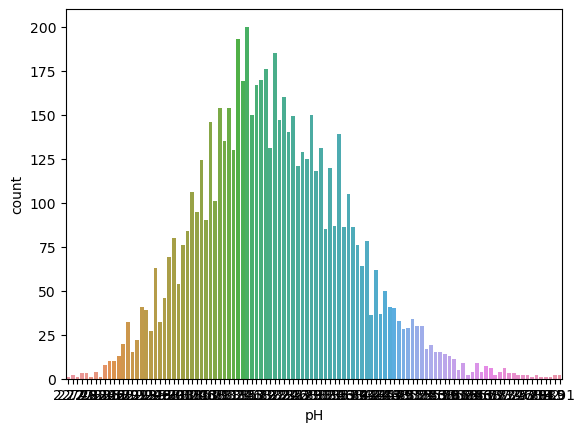

In [13]:
plt.figure(figsize=(40, 6))
sns.countplot(x=wine['pH'])
plt.show()

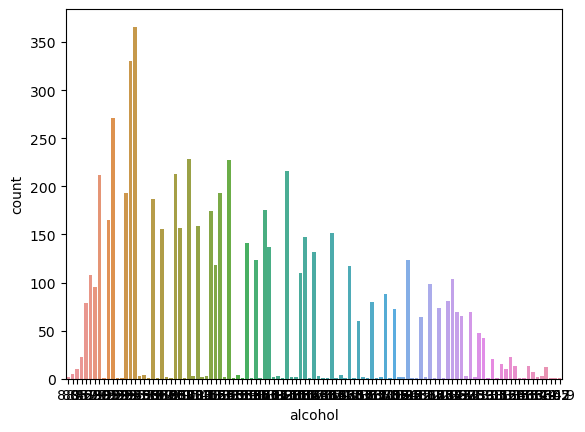

In [14]:
sns.countplot(x=wine['alcohol'])
plt.show()

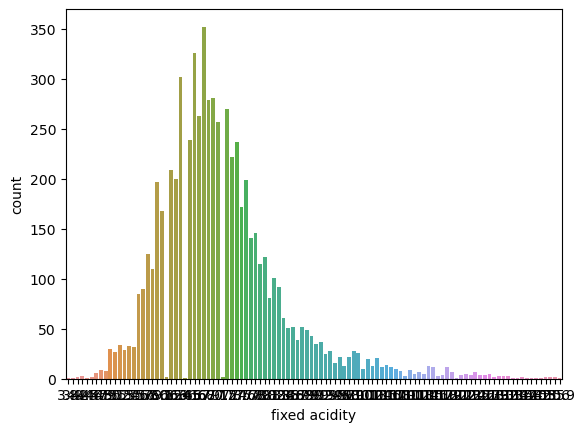

In [15]:
sns.countplot(x=wine['fixed acidity'])
plt.show()

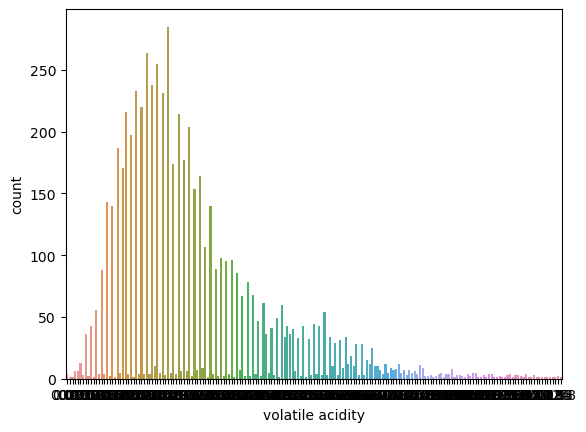

In [16]:
sns.countplot(x=wine['volatile acidity'])
plt.show()

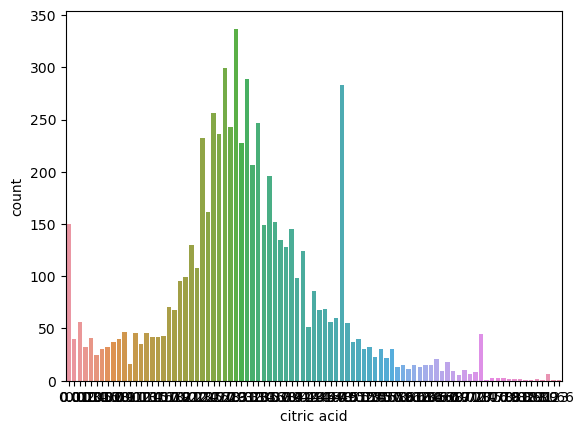

In [17]:
sns.countplot(x=wine['citric acid'])
plt.show()

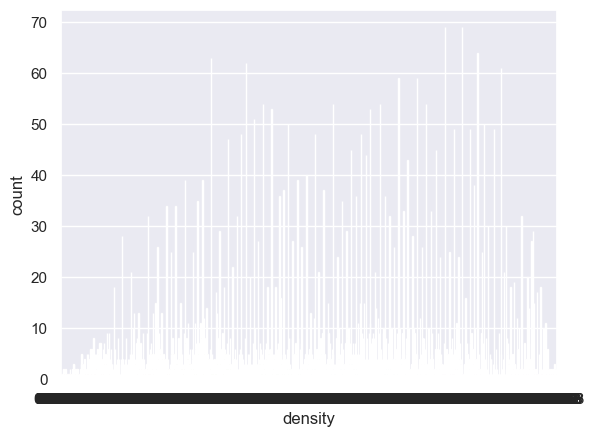

In [18]:
sns.set(style="darkgrid")
sns.countplot(x=wine['density'])
plt.show()

KDE PLOT

<Axes: xlabel='quality', ylabel='Density'>

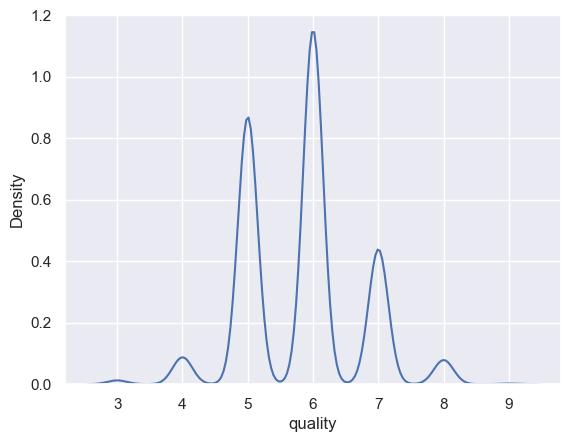

In [19]:
sns.kdeplot(wine.query('quality > 2').quality)

DISTPLOT

<Axes: xlabel='alcohol', ylabel='Density'>

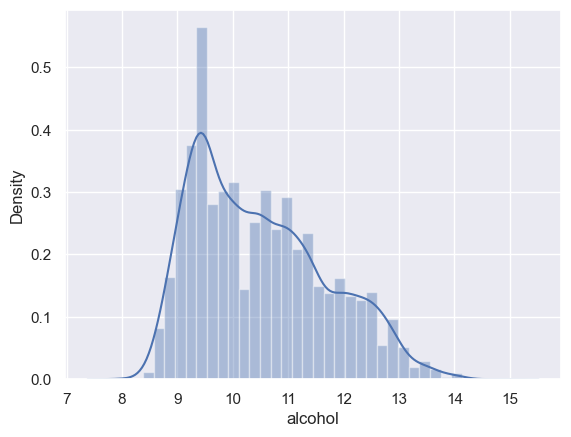

In [21]:
sns.distplot(wine['alcohol'])

BOXPLOT

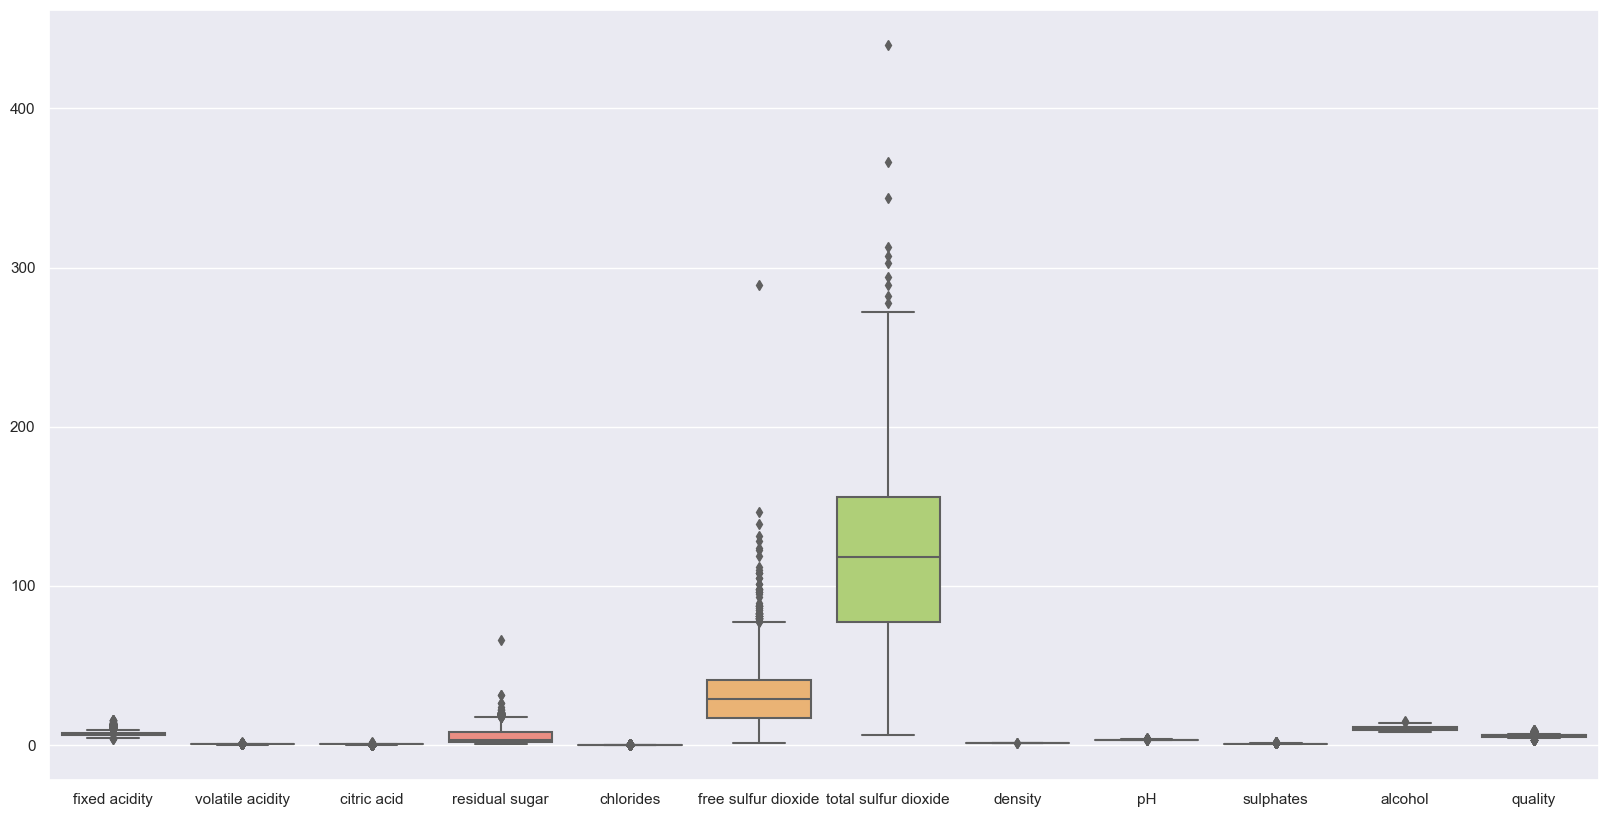

In [22]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=wine,palette="Set3")
plt.show()

HISTOGRAM

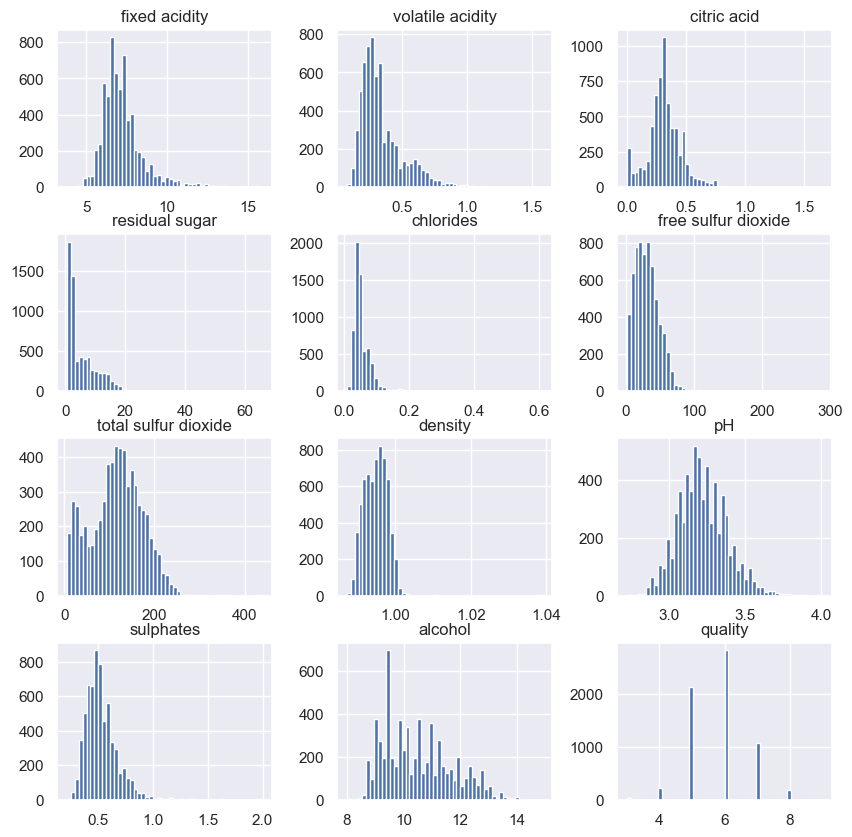

In [23]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

EXPRESSING CORRELATION THROUGH HEATMAP

<Axes: >

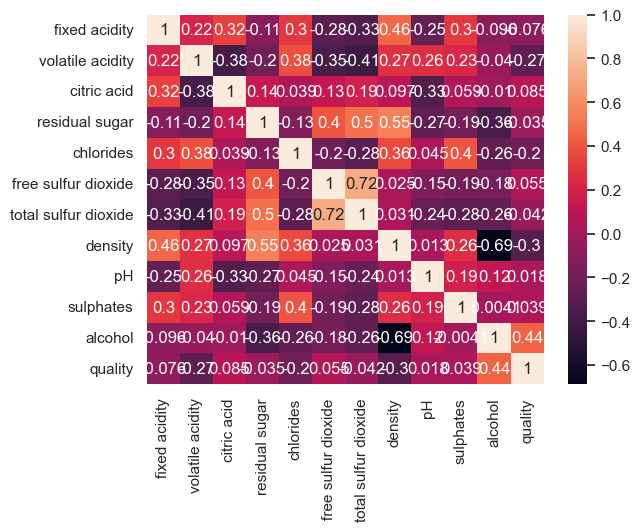

In [24]:
corr = wine.corr()
sns.heatmap(corr,annot=True)

PAIR PLOT

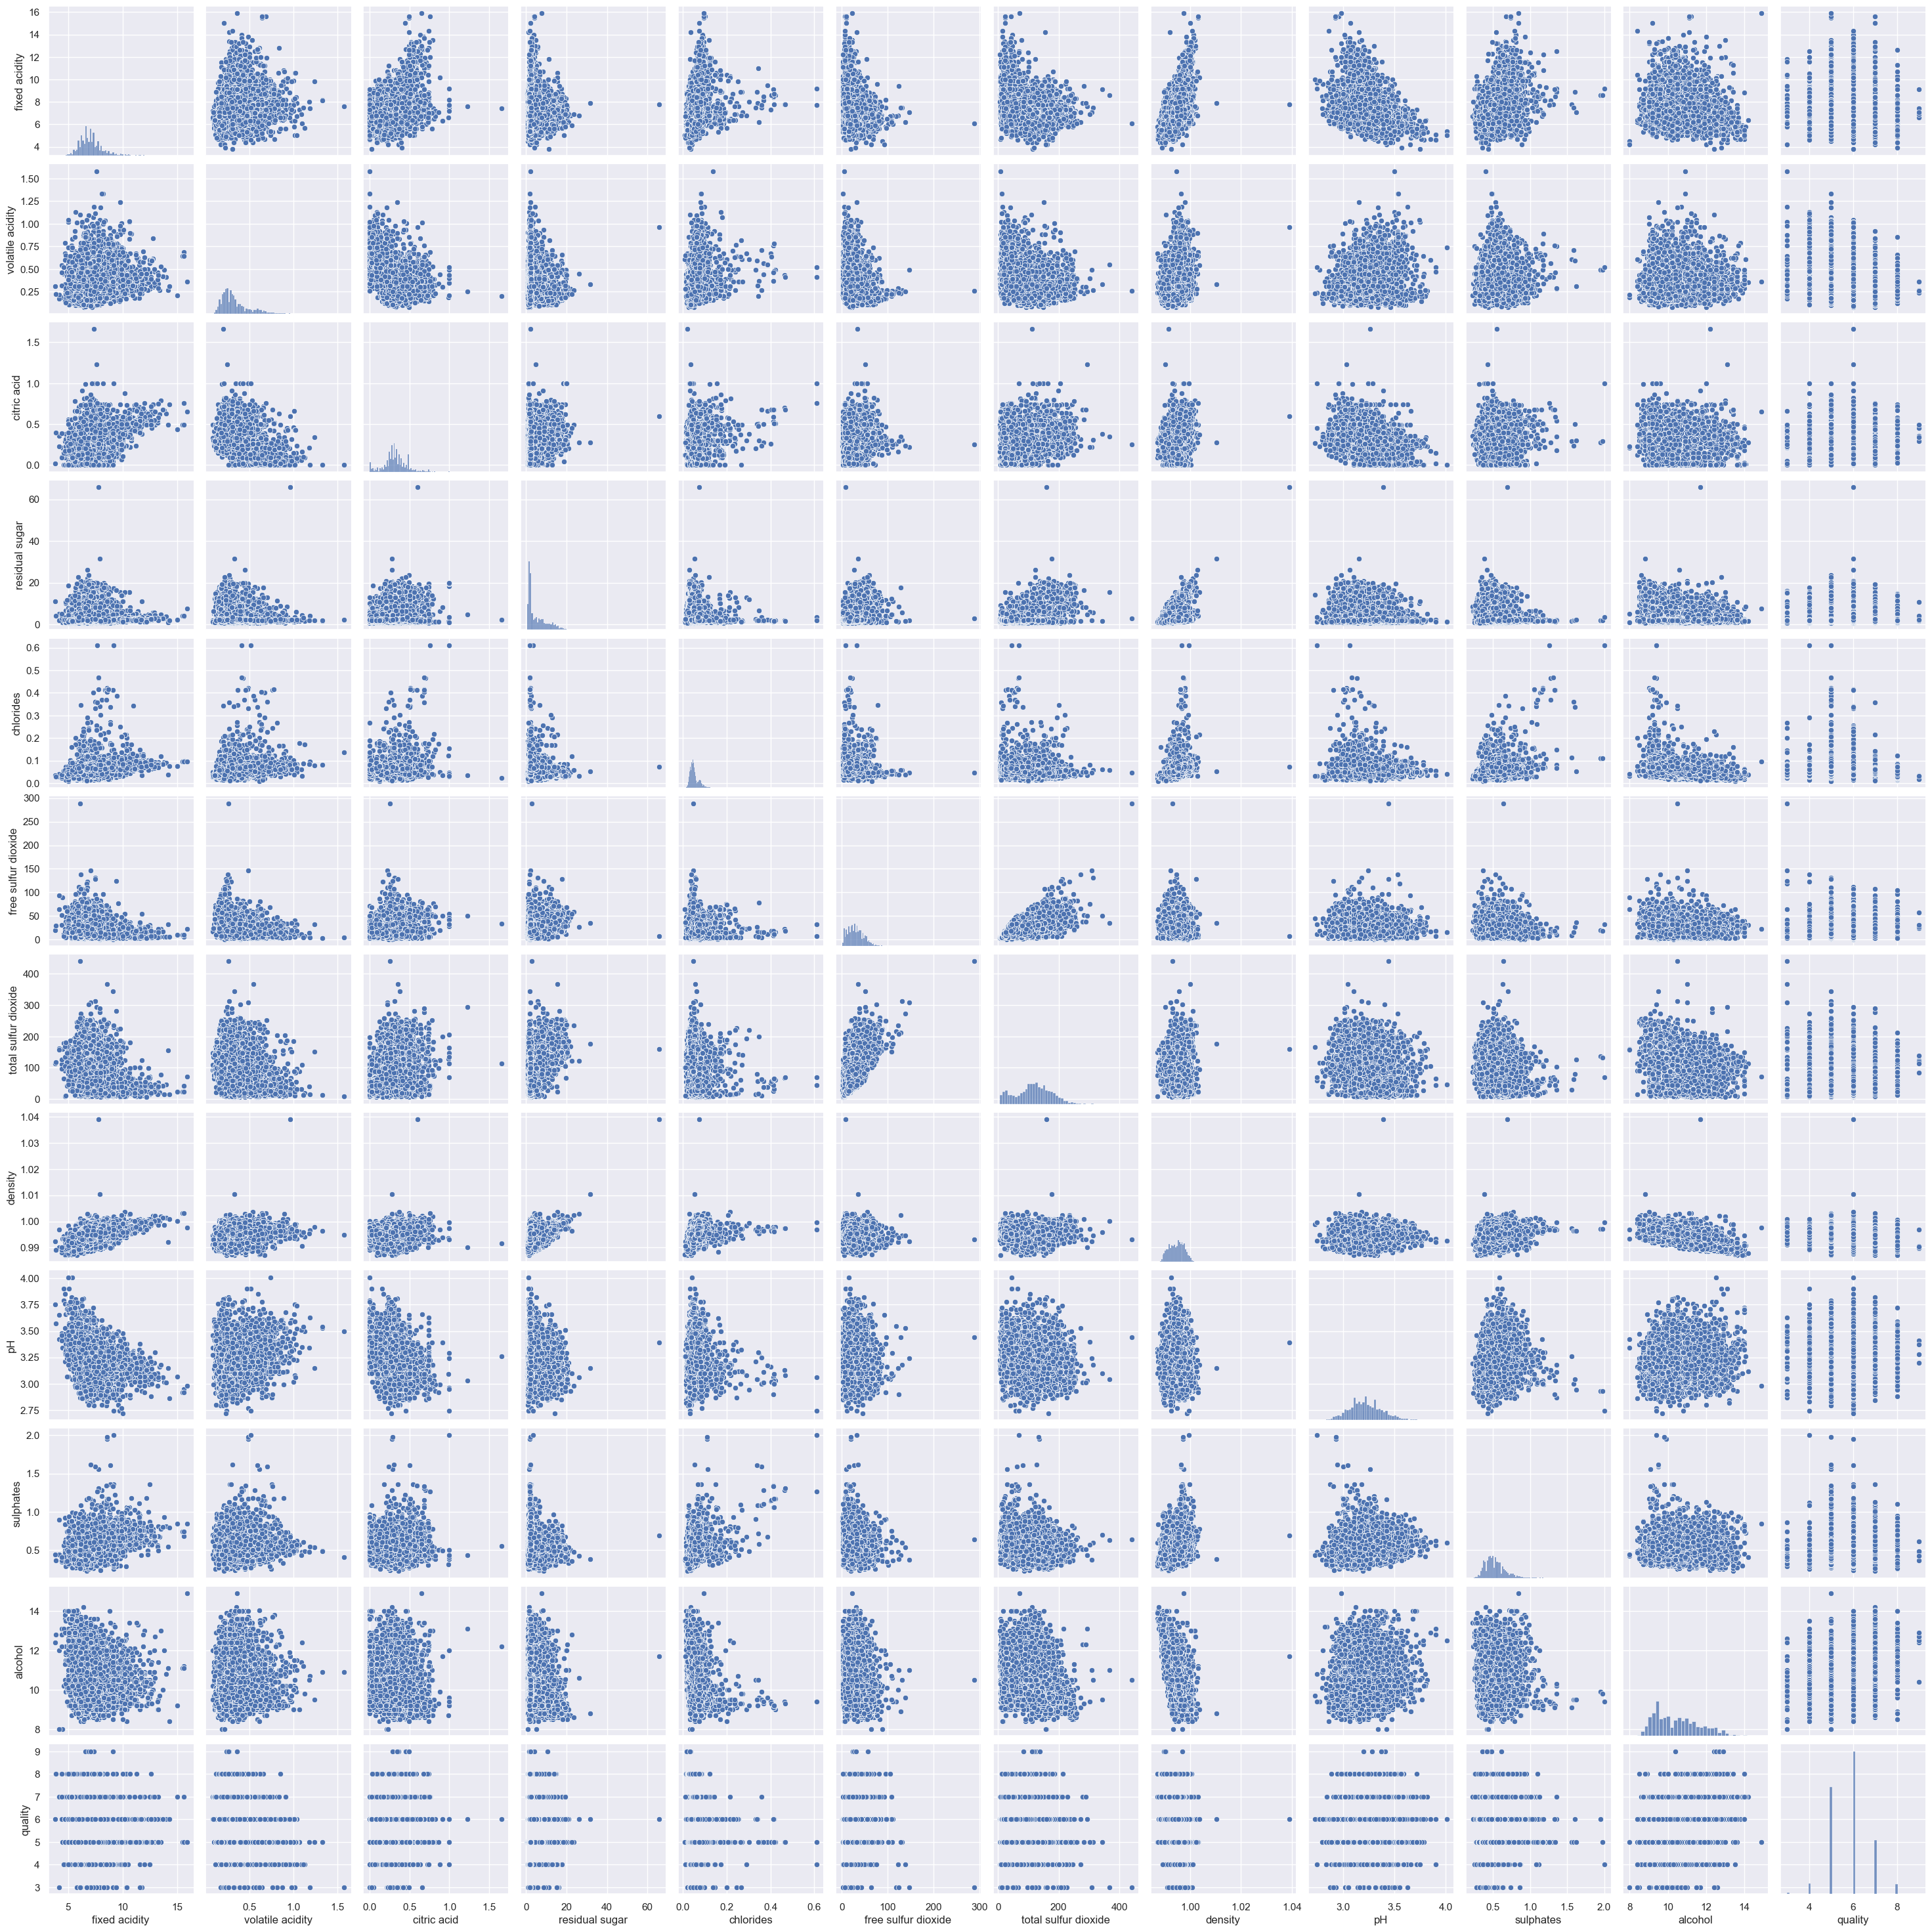

In [25]:
sns.pairplot(wine)

VIOLIN PLOT

<Axes: xlabel='quality', ylabel='alcohol'>

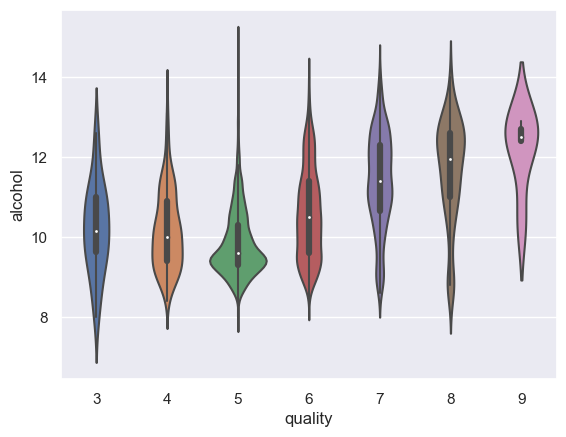

In [26]:
sns.violinplot(x='quality', y='alcohol', data=wine)

FEATURE SELECTION

In [72]:
# Create Classification version of target variable
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','goodquality'], axis = 1) #feature variable
y = wine['goodquality'] #target variable

In [73]:
# See proportion of good vs not good wines
wine['goodquality'].value_counts()

0    5192
1    1271
Name: goodquality, dtype: int64

FEATURE IMPORTANCE

In [74]:
classifiern = ExtraTreesClassifier()
classifiern.fit(X,y)
score = classifiern.feature_importances_
print(score)

[0.07217762 0.09028158 0.07723092 0.08022385 0.07946627 0.07903831
 0.0780965  0.10580597 0.07829697 0.08207297 0.17730904]


SPLITTING DATASET

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

LOGISTIC REGRESSION

In [106]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy Score:", accuracy1)
precision1 = precision_score(y_test, y_pred1)
print("Precision Score:", precision1)
recall1 = recall_score(y_test, y_pred1)
print("Recall Score:", recall1)
f1_1 = f1_score(y_test, y_pred1)
print("F1 Score:", f1_1)
conf_matrix1 = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:\n", conf_matrix1)

Accuracy Score: 0.8179473955647241
Precision Score: 0.5789473684210527
Recall Score: 0.1778975741239892
F1 Score: 0.2721649484536082
Confusion Matrix:
 [[1520   48]
 [ 305   66]]


K-NEAREST-NEIGHBORHOOD

In [107]:
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy Score:", accuracy2)
precision2 = precision_score(y_test, y_pred2)
print("Precision Score:", precision2)
recall2 = recall_score(y_test, y_pred2)
print("Recall Score:", recall2)
f1_2 = f1_score(y_test, y_pred2)
print("F1 Score:", f1_2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:\n", conf_matrix2)

Accuracy Score: 0.8045384218669417
Precision Score: 0.4868421052631579
Recall Score: 0.39892183288409705
F1 Score: 0.43851851851851853
Confusion Matrix:
 [[1412  156]
 [ 223  148]]


SUPPORT VECTOR CLASSIFIER

In [110]:
model3 = SVC()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy Score:", accuracy3)
precision3 = precision_score(y_test, y_pred3)
print("Precision Score:", precision3)
recall3 = recall_score(y_test, y_pred3)
print("Recall Score:", recall3)
f1_3 = f1_score(y_test, y_pred3)
print("F1 Score:", f1_3)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:\n", conf_matrix3)

Accuracy Score: 0.8086642599277978
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[1568    0]
 [ 371    0]]


DECISION TREE

In [111]:
model4 = DecisionTreeClassifier(criterion='entropy')
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy Score:", accuracy4)
precision4 = precision_score(y_test, y_pred4)
print("Precision Score:", precision4)
recall4 = recall_score(y_test, y_pred4)
print("Recall Score:", recall4)
f1_4 = f1_score(y_test, y_pred4)
print("F1 Score:", f1_4)
conf_matrix4 = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:\n", conf_matrix4)

Accuracy Score: 0.8272305312016504
Precision Score: 0.5456852791878173
Recall Score: 0.5795148247978437
F1 Score: 0.562091503267974
Confusion Matrix:
 [[1389  179]
 [ 156  215]]


GAUSSIAN NB

In [112]:
model5 = GaussianNB()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred5)
print("Accuracy Score:", accuracy5)
precision5 = precision_score(y_test, y_pred5)
print("Precision Score:", precision5)
recall5 = recall_score(y_test, y_pred5)
print("Recall Score:", recall5)
f1_5 = f1_score(y_test, y_pred5)
print("F1 Score:", f1_5)
conf_matrix5 = confusion_matrix(y_test, y_pred5)
print("Confusion Matrix:\n", conf_matrix5)

Accuracy Score: 0.7462609592573491
Precision Score: 0.3947826086956522
Recall Score: 0.6118598382749326
F1 Score: 0.4799154334038055
Confusion Matrix:
 [[1220  348]
 [ 144  227]]


RANDOM FOREST CLASSIFIER

In [113]:
model6 = RandomForestClassifier()
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
accuracy6 = accuracy_score(y_test, y_pred6)
print("Accuracy Score:", accuracy6)
precision6 = precision_score(y_test, y_pred6)
print("Precision Score:", precision6)
recall6 = recall_score(y_test, y_pred6)
print("Recall Score:", recall6)
f1_6 = f1_score(y_test, y_pred6)
print("F1 Score:", f1_6)
conf_matrix6 = confusion_matrix(y_test, y_pred6)
print("Confusion Matrix:\n", conf_matrix6)

Accuracy Score: 0.887570912841671
Precision Score: 0.7822878228782287
Recall Score: 0.5714285714285714
F1 Score: 0.660436137071651
Confusion Matrix:
 [[1509   59]
 [ 159  212]]


XGBOOST CLASSIFIER

In [114]:
model7 = xgb.XGBClassifier()
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
accuracy7 = accuracy_score(y_test, y_pred7)
print("Accuracy Score:", accuracy7)
precision7 = precision_score(y_test, y_pred7)
print("Precision Score:", precision7)
recall7 = recall_score(y_test, y_pred7)
print("Recall Score:", recall7)
f1_7 = f1_score(y_test, y_pred7)
print("F1 Score:", f1_7)
conf_matrix7 = confusion_matrix(y_test, y_pred7)
print("Confusion Matrix:\n", conf_matrix7)

Accuracy Score: 0.8710675605982465
Precision Score: 0.6957928802588996
Recall Score: 0.5795148247978437
F1 Score: 0.6323529411764706
Confusion Matrix:
 [[1474   94]
 [ 156  215]]


COMPARING THE CLASSIFICATION SYSTEM

In [115]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost'],
    'Score': [0.818,0.805,0.809,0.827,0.746,0.888,0.877]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.888,Random Forest
0.877,Xgboost
0.827,Decision Tree
0.818,Logistic Regression
0.809,SVC
0.805,KNN
0.746,GaussianNB


PREDICTION MODEL

In [56]:
# Assuming X_new is the data you want to predict on
to_predict = np.array([13.7,0.415,0.68,2.9,0.085,17,43,1.0014,3.06,0.8,10])

reshaped_data = to_predict.reshape(1, -1)

# Make predictions
prediction = model6.predict(reshaped_data)
print(prediction)

[0]
